In [12]:
G = nx.from_scipy_sparse_matrix(net.adjacency, create_using = nx.DiGraph())

In [13]:
print('number of vertices: ', G.number_of_nodes(), 'number of edges', G.number_of_edges())

number of vertices:  2240 number of edges 6452


We can also try to visualize the graph where the size of the nodes is proportional to its degree

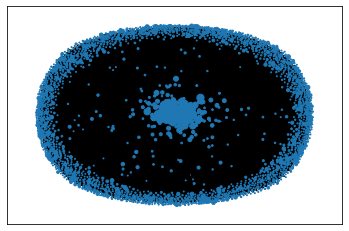

In [16]:
d = dict(G.degree)

nx.draw_networkx(G, with_labels=False, nodelist=list(d.keys()), node_size=[v for v in d.values()])
plt.show()

# 1. Centralities

We will calculate (and try to visualize) different node centralities.


## 1.1 Homogeneous centralities

There are not outstanding nodes.


### 1.1.1 Closeness centrality

Closeness centrality $C(u)$ of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.

$$ C(u) = \frac{n-1}{N-1} \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)} $$

where $N$ is the number of nodes in the graph. 

We draw the network with sizes proportional to the closeness centrality

In [46]:
CC = nx.closeness_centrality(G)
nodes_CC = np.argsort(list(CC.values()))
CC

{0: 0.0,
 1: 0.00044662795891022776,
 2: 0.00923664629916471,
 3: 0.0,
 4: 0.00044662795891022776,
 5: 0.0,
 6: 0.008330884207651917,
 7: 0.006160385640141073,
 8: 0.0033707770483790774,
 9: 0.009828004448764766,
 10: 0.0,
 11: 0.007608010167015854,
 12: 0.0,
 13: 0.0008932559178204555,
 14: 0.008780792396050594,
 15: 0.006342716517141221,
 16: 0.00044662795891022776,
 17: 0.005197125340046287,
 18: 0.0022331397945511387,
 19: 0.0020818625826621905,
 20: 0.000595503945213637,
 21: 0.000595503945213637,
 22: 0.006201257429484316,
 23: 0.0022969437886811712,
 24: 0.0,
 25: 0.0032888058792480412,
 26: 0.0024316411096223516,
 27: 0.00636916631544515,
 28: 0.009187775154724685,
 29: 0.0,
 30: 0.0,
 31: 0.008222014698120101,
 32: 0.000595503945213637,
 33: 0.0,
 34: 0.00044662795891022776,
 35: 0.0,
 36: 0.0015950998532508133,
 37: 0.0013398838767306833,
 38: 0.0013398838767306833,
 39: 0.007254420303181568,
 40: 0.0,
 41: 0.003529450211875947,
 42: 0.0013398838767306833,
 43: 0.009444547326

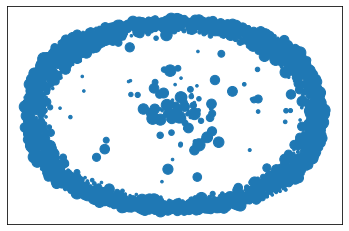

In [24]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*15000 for v in CC.values()])
plt.show()

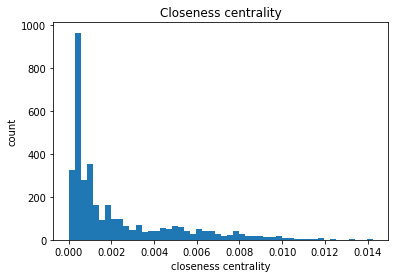

In [55]:
plt.hist(CC.values(), bins=50, density=True)
plt.title("Closeness centrality")
plt.xlabel( 'closeness centrality')
plt.ylabel('count')
plt.show()

Most of the nodes have similar closeness centrality.

### 1.1.2. Page-rank centrality

The page-rank centrality of a node tries to balance the number of links the node receives, the link propensity of the linkers and the centrality of the linkers. The page-rank centrality of a node $x_i$ is computed as follows:

$$
PR(x_i) = \alpha \sum_j a_{ji}\frac{x_j}{L(j)}+\frac{1-\alpha}{N},
$$
where $N$ is the number of nodes, $L(j)$ is the out-degree of the $j$-th node and $\alpha\in[0,1]$. It is very common to take $\alpha=0.85$.

We draw the network with sizes proportional to the page-rank centrality.

In [50]:
PRC = nx.pagerank(G)
nodes_PRC = np.argsort(list(PRC.values()))
PRC

{0: 0.0003884981653823613,
 1: 0.00039654898396581246,
 2: 0.0005197681642927169,
 3: 0.0003884981653823613,
 4: 0.0004120755626624682,
 5: 0.0003884981653823613,
 6: 0.0005118232497485533,
 7: 0.0005334567753626706,
 8: 0.00039688219567265883,
 9: 0.0004871272358486285,
 10: 0.0003884981653823613,
 11: 0.00046875275901178947,
 12: 0.0003884981653823613,
 13: 0.0005810469098365675,
 14: 0.0010240721920096736,
 15: 0.0005126769814812737,
 16: 0.0007185817273038576,
 17: 0.00047005414528626004,
 18: 0.00041708172110302243,
 19: 0.0004941012381941989,
 20: 0.00040145745379824234,
 21: 0.00041628266422187674,
 22: 0.0005378113529144762,
 23: 0.0004431577086943178,
 24: 0.0003884981653823613,
 25: 0.00048469996071012333,
 26: 0.0004125999851737365,
 27: 0.0005399249767012983,
 28: 0.0005407948073071281,
 29: 0.0003884981653823613,
 30: 0.0003884981653823613,
 31: 0.00046629430601915546,
 32: 0.00041628266422187674,
 33: 0.0003884981653823613,
 34: 0.0003895493869171432,
 35: 0.0003884981653

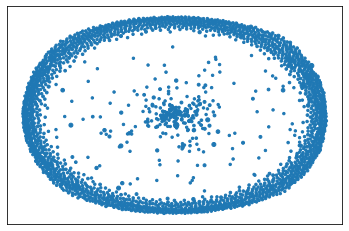

In [30]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e4 for v in PRC.values()])
plt.show()

We observe that all nodes have a similar page rank centrality. It is due to the fact that the vector of page-rank centralities adds up to 1 and there are a lot of nodes, so the mass gets quite shared.

Let us now highlight the 10 nodes with highest centrality by plotting them in red. Moreover, we are going to increase a bit the size of the nodes, while keeping it related with its centrality value.

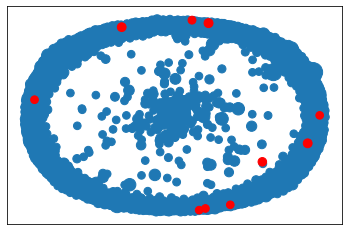

In [31]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e5 for v in PRC.values()])
max_list = list({k: v for k, v in sorted(PRC.items(), key=lambda item: item[1], reverse=True)[0:10]}.keys())
sub_G = G.subgraph(max_list)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=[v*1.5e5 for v in PRC.values()])
plt.show()

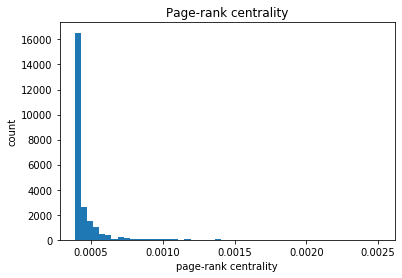

In [58]:
plt.hist(PRC.values(), bins=50, density=True)
plt.title("Page-rank centrality")
plt.xlabel( 'page-rank centrality')
plt.ylabel('count')
plt.show()

### 1.1.3. Katz centrality

Katz centrality generalizes degree centrality by measuring the number of nodes that are reachable while weighting them accoriding to their proximity. That is, it penalizes those who are further. The Katz centrality of the $i$-th node is defined as

$$
KC(x_i) = \left[ \sum_{k=0}^\infty \left( \alpha^kA^k \right)\boldsymbol{e} \right]_i,
$$

where $\boldsymbol{e}=(1,1,...,1)^T$.

We draw the network with sizes proportional to the Katz centrality. In addition, we are going to plot in red the nodes with highest centrality.

In [51]:
KC = nx.katz_centrality(G)
nodes_KC = np.argsort(list(KC.values()))
KC

{0: 0.015248351094263835,
 1: 0.01677318620369022,
 2: 0.03911168282105835,
 3: 0.015248351094263835,
 4: 0.01677318620369022,
 5: 0.015248351094263835,
 6: 0.035796029133519126,
 7: 0.0349659938942564,
 8: 0.021189047046753905,
 9: 0.046927325432331725,
 10: 0.015248351094263835,
 11: 0.03598003007127254,
 12: 0.015248351094263835,
 13: 0.0182980213131166,
 14: 0.044699105219370136,
 15: 0.019718260922400872,
 16: 0.01677318620369022,
 17: 0.031411603254183504,
 18: 0.017680226271658075,
 19: 0.01854120854266219,
 20: 0.016925669714632857,
 21: 0.016925669714632857,
 22: 0.035543906400729,
 23: 0.02332997717422367,
 24: 0.015248351094263835,
 25: 0.026379647393076435,
 26: 0.023177493663281028,
 27: 0.02369580911787968,
 28: 0.04337532887487073,
 29: 0.015248351094263835,
 30: 0.015248351094263835,
 31: 0.03646086500263974,
 32: 0.016925669714632857,
 33: 0.015248351094263835,
 34: 0.01677318620369022,
 35: 0.015248351094263835,
 36: 0.020127823444428265,
 37: 0.019822856422542987,
 3

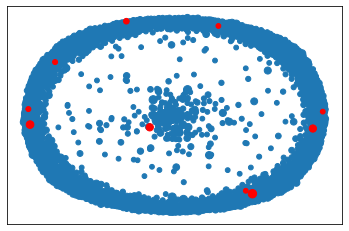

In [33]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e3 for v in KC.values()])
max_list = list({k: v for k, v in sorted(KC.items(), key=lambda item: item[1], reverse=True)[0:10]}.keys())
sub_G = G.subgraph(max_list)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=[v*1.5e3 for v in KC.values()])
plt.show()

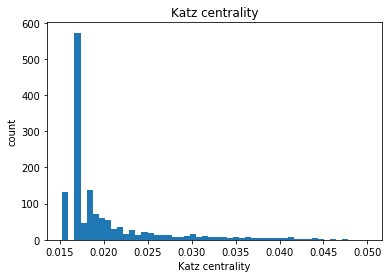

In [59]:
plt.hist(KC.values(), bins=50, density=True)
plt.title("Katz centrality")
plt.xlabel( 'Katz centrality')
plt.ylabel('count')
plt.show()

We observe that all the nodes have a very similar Katz centrality value.

## 1.2 Not homogeneous centralities

We can find outstanding nodes

### 1.2.1 Betweenness centrality 

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:

$$
c_B(v) = \sum_{s,t \in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}
$$

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$ other than $s,t$. If $s=t$, $\sigma(s,t)=1$, and if $v \in s,t$,  $\sigma(s,t|v)=0$. 

We draw the network with sizes proportional to the betweeness centrality

In [47]:
CB = nx.betweenness_centrality(G)
nodes_CB = np.argsort(list(CB.values()))
CB

{0: 0.0,
 1: 2.5344839491331068e-05,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.000334405533131027,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 6.166579057339607e-05,
 15: 0.0,
 16: 1.0377414594875713e-05,
 17: 0.0,
 18: 4.05118300530725e-05,
 19: 0.0,
 20: 2.414744549961464e-05,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 7.403886182113251e-05,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.00033400640180045486,
 32: 0.0,
 33: 0.0,
 34: 1.995656652860714e-07,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 9.283129530223757e-05,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 4.530140601993821e-05,
 45: 0.0,
 46: 4.989141632151785e-06,
 47: 0.0,
 48: 0.0013210581823053643,
 49: 0.0,
 50: 1.696308154931607e-05,
 51: 0.00014099314252460945,
 52: 1.1574808586592142e-05,
 53: 4.7895759668657135e-06,
 54: 0.0,
 55: 0.0,
 56: 0.0003186731065176417,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 5.986969958582142e-07,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66:

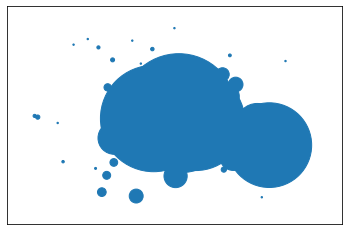

In [26]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1e7 for v in CB.values()])
plt.show()

There are very few nodes with high betweeness centrality. Their betweeness centrality is two or three orders of magnitude larger than the other nodes' betweeness centrality.

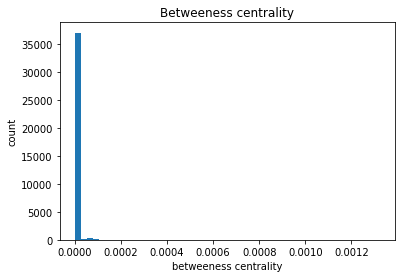

In [56]:
plt.hist(CB.values(), bins=50, density=True)
plt.title("Betweeness centrality")
plt.xlabel( 'betweeness centrality')
plt.ylabel('count')
plt.show()

### 1.2.2. Eigenvector centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i-th$ element of the vector $x$ defined by the equation

$$
Ax = \lambda x
$$

where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$. By virtue of the Perron–Frobenius theorem, there is a unique solution $x$, all of whose entries are positive, if $\lambda$ is the largest eigenvalue of the adjacency matrix $A$.

We draw the network with sizes proportional to the eigenvector centrality.

In [48]:
EC = nx.eigenvector_centrality(G)
nodes_EC = np.argsort(list(EC.values()))
EC

{0: 3.206121470273459e-14,
 1: 7.053467234601611e-13,
 2: 0.021028686010681526,
 3: 3.206121470273459e-14,
 4: 7.053467234601611e-13,
 5: 3.206121470273459e-14,
 6: 0.002427281844698377,
 7: 3.8851779976773807e-10,
 8: 7.731773208969336e-07,
 9: 0.0024272818696099412,
 10: 3.206121470273459e-14,
 11: 0.006720219508903034,
 12: 3.206121470273459e-14,
 13: 1.3786322322175875e-12,
 14: 6.960025215497314e-05,
 15: 4.8722746041709115e-05,
 16: 7.053467234601611e-13,
 17: 4.7162046827722584e-11,
 18: 8.913249211009944e-05,
 19: 5.1460569162650304e-05,
 20: 7.438201811034424e-12,
 21: 7.438201811034424e-12,
 22: 1.3828001901289428e-10,
 23: 2.359705402121267e-11,
 24: 3.206121470273459e-14,
 25: 2.494362503872752e-11,
 26: 1.6864198933638402e-11,
 27: 0.1101077064550816,
 28: 0.26509865063672894,
 29: 3.206121470273459e-14,
 30: 3.206121470273459e-14,
 31: 0.12248988866689277,
 32: 7.438201811034424e-12,
 33: 3.206121470273459e-14,
 34: 7.053467234601611e-13,
 35: 3.206121470273459e-14,
 36: 

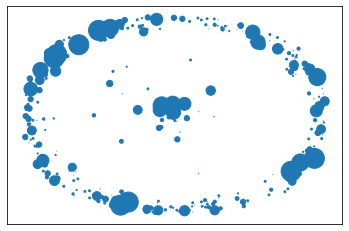

In [28]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e3 for v in EC.values()])
plt.show()

Notice that there are few nodes with high eigenvector centrality.

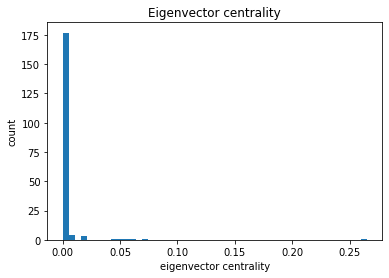

In [57]:
plt.hist(EC.values(), bins=50, density=True)
plt.title("Eigenvector centrality")
plt.xlabel( 'eigenvector centrality')
plt.ylabel('count')
plt.show()

### 1.2.3. Clustering

The clustering coefficient of a node provides information about the clustering tendency of its neighbors. The clustering coefficient of the $i$-th node is computed as:

$$
CLT(x_i)=\frac{\text{#triangles connected to $i$}}{\text{#possible triangles connected to $i$}}.
$$

Let us begin by computing the average clustering coefficient for the graph.

In [34]:
nx.average_clustering(G)

0.022991199720053465

Let us now draw the network with sizes proportional to the clustering coefficient. In addition, we are going to use different colors to help visualization. The nodes whose coefficients are zero, will be plotted with small red dots.

In [52]:
CLT = nx.clustering(G)
nodes_CLT = np.argsort(list(CLT.values()))
CLT

{0: 0,
 1: 0.01566951566951567,
 2: 0.027472527472527472,
 3: 0,
 4: 0,
 5: 0.00548780487804878,
 6: 0,
 7: 0.015151515151515152,
 8: 0.009829619921363041,
 9: 0.005847953216374269,
 10: 0.0009519923840609275,
 11: 0.015151515151515152,
 12: 0,
 13: 0,
 14: 0.02909090909090909,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0.06944444444444445,
 21: 0,
 22: 0.03787878787878788,
 23: 0.1,
 24: 0.0034482758620689655,
 25: 0.023809523809523808,
 26: 0,
 27: 0.16826923076923078,
 28: 0.17424242424242425,
 29: 0.0010526315789473684,
 30: 0,
 31: 0.0893760539629005,
 32: 0,
 33: 0.0005494393683482225,
 34: 0.16666666666666666,
 35: 0,
 36: 0,
 37: 0,
 38: 0.0037856726849155504,
 39: 0.16666666666666666,
 40: 0,
 41: 0,
 42: 0,
 43: 0.12087912087912088,
 44: 0.05555555555555555,
 45: 0,
 46: 0.007575757575757576,
 47: 0,
 48: 0.07445200302343159,
 49: 0.02197802197802198,
 50: 0.0023375409069658717,
 51: 0.0031781226903178123,
 52: 0.1,
 53: 0.009615384615384616,
 54: 0,
 55: 0,
 56: 0.17105263

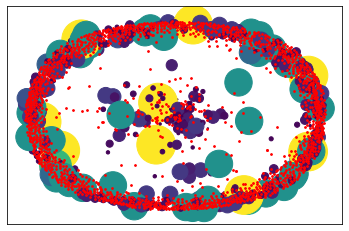

In [36]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_color=[v*10 for v in CLT.values()],
                      node_size = [v*1.5e3 for v in CLT.values()])
zero_nodes = [k for k, v in CLT.items() if v == 0]
sub_G = G.subgraph(zero_nodes)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=3)
plt.show()

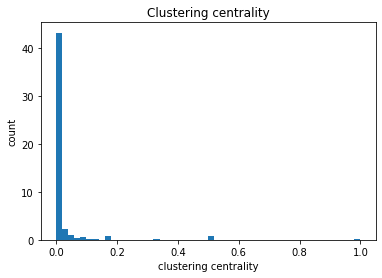

In [60]:
plt.hist(CLT.values(), bins=50, density=True)
plt.title("Clustering centrality")
plt.xlabel( 'clustering centrality')
plt.ylabel('count')
plt.show()

Notice that there is a wide variety of behaviors. 

## 1.3 Importance of the nodes

In [75]:
print('top 10 nodes with highest closeness centrality', nodes_CC[:10])
print('top 10 nodes with highest page-rank centrality', nodes_PRC[:10])
print('top 10 nodes with highest Katz centrality', nodes_KC[:10])

top 10 nodes with highest closeness centrality [   0  411 1621 1623  401  398  395 1637  392 1639]
top 10 nodes with highest page-rank centrality [   0  325  915  917  931  943  988 1031  314  175]
top 10 nodes with highest Katz centrality [   0  411 1621 1623  401  398  395 1637  392 1639]


In [72]:
print('top 10 nodes with highest betweeness centrality', nodes_CB[:10])
print('top 10 nodes with highest eigenvector centrality', nodes_EC[:10])
print('top 10 nodes with highest clustering centrality', nodes_CLT[:10])

top 10 nodes with highest betweeness centrality [   0 1502 1501 1500 1499 1498 1497 1496 1495 1494]
top 10 nodes with highest eigenvector centrality [   0  411 1621 1623  401  398  395 1637  392 1639]
top 10 nodes with highest clustering centrality [   0 1503 1502 1501 1500 1499 1498 1497 1496 1495]


The first thing we notice is that the first node has the highest of all the centralities. It may correspond to a very common protein that interacts with many other proteins. 

Apart from that, we notice that there are mainly three groups of nodes:


+ The nodes with highest eigenvector, closeness and Katz centrality. These centralities all take into account the distance to the reachable nodes. For this reason it is expectable that some nodes will have a high value for these three measures. 

+ The nodes with highest betweenes and clustering. These centralities do not measure the distance of the reachable nodes, but the strucuture (or topology) of the network.  For this reason it is expectable that some nodes will have a high value for these measures.

+ The nodes with higest page-rank centrality. The page-rank centrality is very homogeneous among all nodes. Therefore, there are not outstanding nodes with high centrality values, and the top ten values may be just some random nodes. 

# 2. Macroscale properties

## 2.1. Clustering

Now we will look at clustering properties of the network.

Remember the definition of the clustering coefficient of a node:

### Clustering coefficient of a node

$$
C_i = \frac{2\cdot E_i}{k_i(k_i-1)}
$$

where $E_i$ is the number of triangles of node $i$, and $k_i(k_i-1)$ represents the total number of triangles that the node could possibly have, being $k_i$ the node's degree. 

With this deffinition we can define the *global* clustering coefficient of the network.

### Clustering of the network

$$
C = \frac{1}{N} \sum_{i=1}^N C_i,
$$
where $N$ is the total number of nodes of the graph. Notice that it is the average clustering coefficient of all nodes.

In [17]:
print('Average clustering coefficient:', nx.average_clustering(G))

Average clustering coefficient: 0.022991199720053465


We can also inspect the clustering coefficient of a node as a function of the degree of such nodes.

In [18]:
clus = nx.clustering(G)
deg = dict(G.degree())

In [19]:
idx = np.argsort(list(deg.values()))

deg_vals = np.array(list(deg.values()))[idx]
clus_vals = np.array(list(clus.values()))[idx]

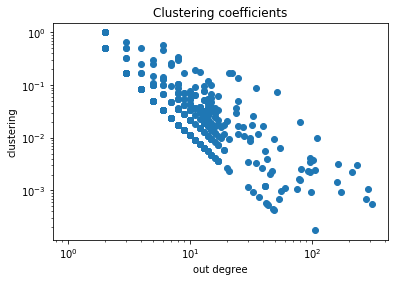

In [20]:
plt.plot(deg_vals, clus_vals, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Clustering coefficients")
plt.xlabel('out degree')
plt.ylabel('clustering')
plt.show()

We observe some descreasing tendency. This happens because as the number of connection increases, it becomes more unlikely that the neighbours of a node are also connected. For this reason, we expect the clustering coefficient to decrease with the degree of the node.

### Newman Clustering Coefficient


It is also known as the transitivity index of the network. It is the fraction of all possible triangles present in G. Possible triangles are identified by the number of “triads” (two edges with a shared vertex).

In [23]:
print('The Newman clustering coefficient is: ', nx.transitivity(G))

The Newman clustering coefficient is:  0.0015705864234240004


We observe that it is smaller than the clustering coefficient, but of the same order. The clustering coefficient quantifies how clustered is the network locally, while the Newman clustering coefficient quantifies how clustered is the network as a whole.

## 2.2. Degree Distribution

We will compute $P(k)$, that is, the probability that a randomly selected node has degree $k$. It is a measure in the spread the number of links the nodes have. 

In [24]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 

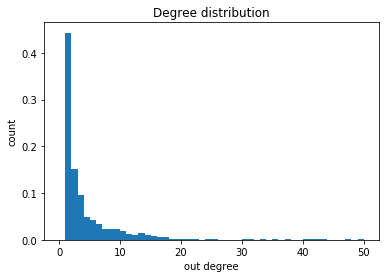

In [25]:
plt.hist(degree_sequence, bins=50, density=True, range=(0,50))
plt.title("Degree distribution")
plt.xlabel('out degree')
plt.ylabel('count')
plt.show()

We can see that with this histogram it is very hard to see the actual distribution of $P(k)$.

We observe that there are a lot of nodes with zero degree, and then the number decreases to zero. 

We want to see if the decrease to zero is exponential or if it follows a power low.

First of all, we plot the same histogram using a log-log scale.

In [28]:
coef = np.polyfit(np.log10(hist[1][2:26]),np.log10(hist[0][1:25]),1)
poly1d_fn = np.poly1d(coef) 

print('Slope of linear fit: ', coef[0])

Slope of linear fit:  -2.422838637957744


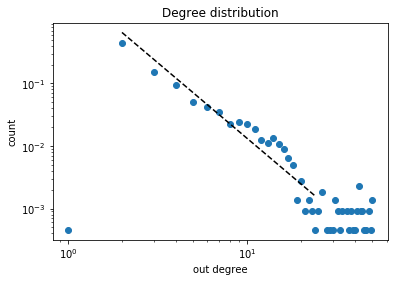

In [29]:
plt.plot(hist[1][1:],hist[0], 'o')
plt.plot(hist[1][2:25], np.power(10,poly1d_fn(np.log10(hist[1][2:25]))), '--k')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree distribution")
plt.xlabel('out degree')
plt.ylabel('count')
plt.show()

We observe that more or less until degree 11, the distribution decays following a power low. For degrees larger than 11, there are very few nodes with such large degree, and therefore the probabilty of having such degree stabilizes.

The slope of the linear fit if of around -2.3.

## 2.3. Robustness

Let us begin by defining some notation by following the paper "Attack Robustness and Centrality of Complex Networks" that was introduced on the slides. Let $G$ be a graph and $N$ the total number of nodes. Let $N_\rho$ be the network that results from removing a fraction $\rho$ of the vertices according to some specified procedure. We will denote by $N_\rho '$ the largest component of $N_\rho$. Then, we define
$$
\sigma(\rho) = \frac{|N_\rho '|}{N},
$$
where |$N_\rho '$| is the number of nodes of the network $N_\rho '$. 

The robustness of a network may be measured by how $\sigma(\rho)$ varies as $\rho$ increases. In other words, it is measured by how the fractional size of its largest component varies when some fraction of the nodes are removed. The robustness of a network under this type of vertex removal can be quantified by the R-index, which is defined as follows
$$
R=\frac{1}{N}\sum_{i=1}^N\sigma(i/N).
$$
Then, we define the V-index, which measures the vulnerability of a network to a given scheme of vertex removal, to be the complementary quantity to R
$$
V = \frac{1}{2}-R.
$$

Notice that, so far, we have been assuming that the vertices are removed according to some specified procedure. The removal methods that we are going to consider are the following:
* **degree**: remove vertices according to their degrees, from highest to lowest.
* **random**: remove vertices randomly by following a uniform distribution.

In addition, we are going to use the centralities studied in the former notebook:
* **closeness**: remove vertices according to their values of closeness centrality, from highest to lowest.
* **betweenness**: remove vertices according to their values of betweeness centrality, from highest to lowest.
* **eigenvector**: remove vertices according to their values of eigenvector centrality, from highest to lowest.
* **page-rank**: remove vertices according to their values of page-rank centrality, from highest to lowest.
* **katz**: remove vertices according to their values of katz centrality, from highest to lowest.
* **clustering**: remove vertices according to their values of average clustering coefficient, from highest to lowest.

Let us now plot $\sigma(\rho)$ of our network by using the above removal procedures.

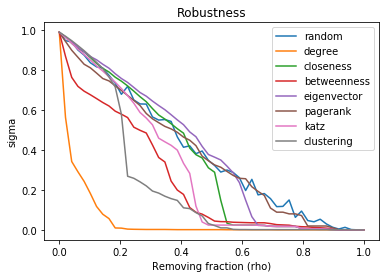

In [34]:
def random_nodes(gr):
    vals = np.random.permutation(len(gr.nodes))
    d = dict()

    for i in range(len(vals)):
        d[i] = vals[i]
    return d


removal_procedures = {'random': random_nodes,
                      'degree': lambda gr: dict(nx.degree(gr)), 
                      'closeness': nx.closeness_centrality,
                      'betweenness':  nx.betweenness_centrality,
                      'eigenvector': nx.eigenvector_centrality, 
                      'pagerank': nx.pagerank, 
                      'katz': nx.katz_centrality,
                      'clustering': nx.clustering}


    
ro_list = list(np.linspace(0.0, 1.0, num=50))
sigma = []
i = 0

for procedure in removal_procedures.keys():    
    for ro in ro_list:
        G_aux = G.copy()
        G_aux.remove_nodes_from(list(nx.isolates(G_aux))) #remove nodes that do not have in nor out neighbors
        N = G_aux.number_of_nodes() #total number of nodes

        #Remove the fraction ro
        centrality = removal_procedures[procedure](G_aux)
        idx = np.argsort(list(centrality.values()))[::-1][:]
        nodes = list(centrality.keys())
        nodes_to_remove = [nodes[i] for i in idx][:int(ro*G_aux.number_of_nodes())]
        G_aux.remove_nodes_from(list(nodes_to_remove))

        #Take the largest component
        try: 
            largest_cc = max(nx.weakly_connected_components(G_aux), key=len)
            G_aux = G_aux.subgraph(largest_cc)
            #compute sigma
            sigma.append(G_aux.number_of_nodes()/N)
        except ValueError:
            sigma.append(0)
        
    #plot
    plt.plot(ro_list, sigma[i*50:(i+1)*50], label=procedure)
    plt.title("Robustness")
    plt.xlabel('Removing fraction (rho)')
    plt.ylabel('sigma')
    i += 1
plt.legend()
plt.show()

We can see that our network is more susceptible to the type of removal that targets the highest degree vertices. Such large-degree vertices (also called *hubs*), are the ones which give structure to the network. We have seen in the previous section that such nodes make the probability distribution of the degree heavy-tailed, so that the decreasing of the degree distribution follows a power law. Therefore, removing those large-degree nodes changes such probabiliy distribution, and therefore the structure of the network.  On the other hand, its highest robustness is achieved by regarding the page-rank centrality removal. We also observe that the network is very robust when removing the nodes randomly.

## 2.4. Correlations

The correlation between two nodes measure at which extent the degrees of the two nodes are related. Correlation can be computed in two different ways.

(i) **Assortativity Degree**: given a network, it measures at which extent the degree of a node is linearly related to its neighbors' degree. It takes values in the range [-1,1]. A coefficient of 1 stands for a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. It is computed as follows
$$
r = \frac{\langle k_ik_j \rangle-\langle k\rangle^2}{\langle k^2 \rangle-\langle k\rangle^2},
$$
where $\langle k\rangle$ is the average degree of the network, $\langle k^2\rangle$ is the average of the squared degree of the network and $\langle k_ik_j\rangle$ is the average of the product of the degrees of all pairs of neighboring nodes.

(ii) **Average Neighbor Degree**: given a node $i$, it is the average of its neighbor's degree. It is computed as follows
$$
k_{nn,i}=\frac{1}{|N(i)|}\sum_{j\in N(i)}k_j,
$$
where $|N(i)|$ is the number of nodes neighbouring $i$ and $k_j$ is the degree of node $j$. 

We distinguish three different types of networks depending on the values of $r$ and the behavior of the plot $k$-$k_{nn}$:
* Assortative: the plot displays an increasing tendency. It happens when the assortativity degree is positive.
* Disassortative: the plot displays a dencreasing tendency. It happens when the assortativity degree is negative.
* No structure: the plot does not display any particular structure. It happens when the assortativity degree is 0.


**Let us begin by computing the assortativity degree.**

In [35]:
print('Degree assortativity of the graph:', nx.degree_assortativity_coefficient(G))

Degree assortativity of the graph: -0.010965433440751684


Since the correlation coefficient is quite close to 0.

**Let us now compute the average neighbor degree.**

By taking logarithms, we expect a relation given by
$$
\log(k_{nn}(k))\sim -\nu \log(k).
$$

Let us now plot it taking logarithms and perform a linear regression. Since the assortativity degree was -0.01, we expect our network not to be assortative nor disassortative. That is, we do not expect a linear relation between $k$ and $k_{nn}$. Therefore, $\nu$ should be close to 0.

In [37]:
AvNeigDegree = nx.average_neighbor_degree(G)
Degree = dict(G.degree)

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression

In [40]:
x = []
for i in list(Degree.values()):
    if i != 0:
        x.append(np.log10(i))
    else:
        x.append(0)
        
y = []
for i in list(AvNeigDegree.values()):
    if i != 0:
        y.append(np.log10(i))
    else:
        y.append(0)
        
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [41]:
Linreg = LinearRegression().fit(x, y)

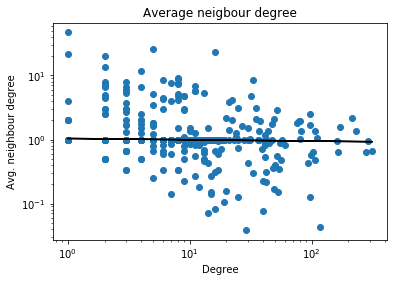

In [42]:
plt.plot(10**x, 10**y, 'o')
plt.plot(10**x, 10**Linreg.predict(x),color='k')
plt.title('Average neigbour degree')
plt.xlabel('Degree')
plt.ylabel('Avg. neighbour degree')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [43]:
print("The slope of the fitting line is {}".format(Linreg.coef_[0][0]))

The slope of the fitting line is -0.02019065730107143


As expected, the above plot does not display any type of structure. In other words, there is no linear correlation between $k$ and $k_{nn}$. In particular, the slope of the fitting line is $\nu\sim 0.006$.